In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

# How many matches we've got in the dataset? 

In [20]:
len(match['id'])

636

# How many seasons we've got in the dataset? 

In [22]:
len(match['season'].unique())

10

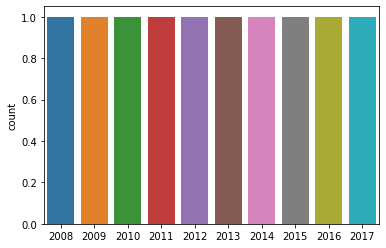

In [8]:
sns.countplot(match['season'].unique())

# Which Team had won by maximum runs? 

In [32]:
match.loc[match['win_by_runs']==match['win_by_runs'].max()]['winner']

43    Mumbai Indians
Name: winner, dtype: object

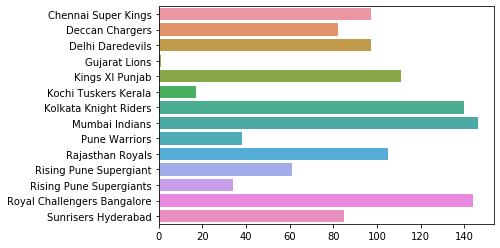

In [166]:
k=match.groupby(by='winner')['win_by_runs'].max()
l1=list(k.index)
l2=[]
for i in k:
    l2.append(i)
sns.barplot(y=l1,x=l2)

In [171]:
#sns.barplot(y='winner',x='win_by_runs',data=match)

# Which Team had won by maximum wicket? 

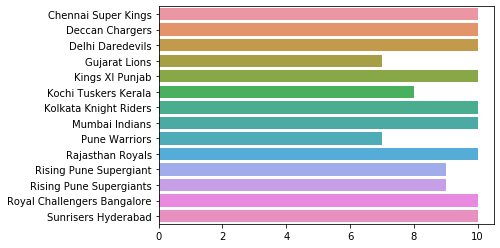

In [169]:
k=match.groupby(by='winner')['win_by_wickets'].max()
l1=list(k.index)
l2=[]
for i in k:
    l2.append(i)
sns.barplot(y=l1,x=l2)

In [34]:
match.loc[match['win_by_wickets']==match['win_by_wickets'].max()] #can be shown as bar graph 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


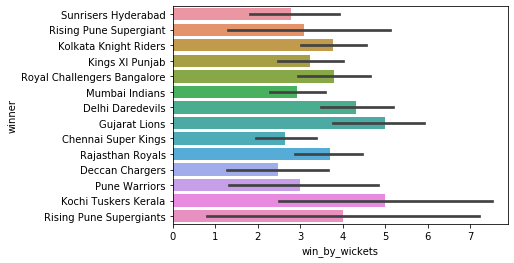

In [150]:
sns.barplot(y='winner',x='win_by_wickets',data=match)

# Which Team had won by closest Margin (minimum runs)? 

In [41]:
match.loc[match['win_by_runs']==match['win_by_runs'].min()]#[['id','winner']]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,629,2016,Visakhapatnam,2016-05-21,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN
629,630,2016,Kanpur,2016-05-21,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN


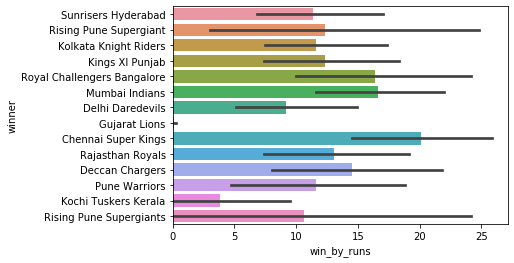

In [151]:
sns.barplot(y='winner',x='win_by_runs',data=match)

# Which Team had won by minimum wicket? 

In [52]:
match.loc[match['win_by_wickets']==match['win_by_wickets'].min()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,2016,Visakhapatnam,2016-05-17,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,C Shamshuddin,NaN
625,626,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
630,631,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN


In [58]:
match.loc[match['win_by_wickets']==1]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
559,560,2015,Kolkata,2015-05-09,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,1,AD Russell,Eden Gardens,AK Chaudhary,HDPK Dharmasena,NaN


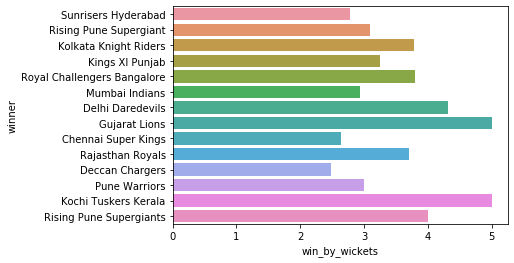

In [141]:
sns.barplot(y='winner',x='win_by_wickets',data=match,ci=0)

# Which Season had most number of matches? 

In [184]:
k=match.groupby(by='season')['id'].count()#['id']['count'].max()
#k['season']=list(k.index)
#mask=k[('id','count')]==k[('id','count')].max()
k


season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
Name: id, dtype: int64

Text(0, 0.5, 'count')

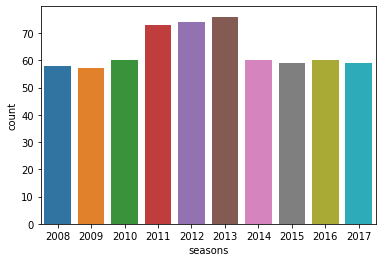

In [13]:
k=match.groupby(by='season')['id'].count()
l1=list(k.index)
l2=[]
for i in k:
    l2.append(i)
sns.barplot(x=l1,y=l2)
plt.xlabel('seasons')
plt.ylabel('count')

# Which IPL Team is more successful?

In [74]:
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [54]:
match['winner'].value_counts().head(1)


Mumbai Indians    92
Name: winner, dtype: int64

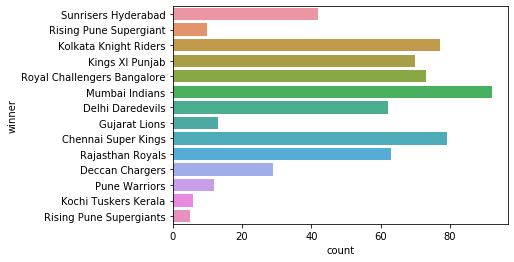

In [53]:
sns.countplot(y=match['winner'],data=match)

# Has Toss-winning helped in winning matches? 

In [46]:
tot=match['toss_winner']==match['winner']
tot.groupby(tot).size()
#w_count=win['winner'].count()
#loss=match.loc[match['toss_winner']!=match['winner']]
#l_count=loss['winner'].count()
#print(w_count)


False    311
True     325
dtype: int64

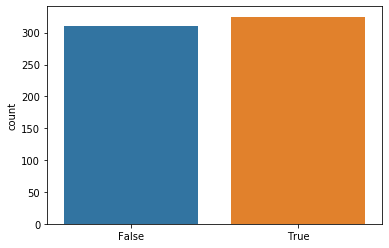

In [44]:
sns.countplot(tot)